In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rasterio

from GCCM_gao import GCCM
%load_ext autoreload
%autoreload 2

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [2]:
# load data

x = rasterio.open('../Gao_code/raster/dTRI.tif')
xMatrix = x.read(1)
xMatrix = xMatrix.T
y = rasterio.open('../Gao_code/raster/Cu.tif')
yMatrix = y.read(1)
yMatrix = yMatrix.T

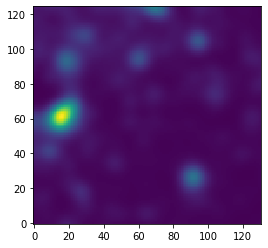

In [3]:
plt.imshow(xMatrix, origin='lower', interpolation='none')

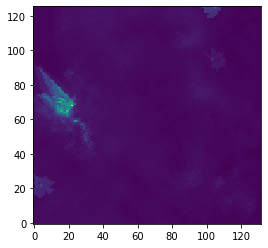

In [4]:
plt.imshow(yMatrix, origin='lower', interpolation='none')

In [30]:
#set parameters

# library sizes
#lib_sizes = np.arange(10,120,20)
#lib_sizes = np.arange(10,120,50)
lib_sizes = np.array([110])

# the dimensions of the embedding   
E = 3   

In [37]:
x_xmap_y = GCCM(xMatrix, yMatrix, lib_sizes, E, cores=None)

Constructing embedding
libsize  110  x xmap y
0 0 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.03474448215295412, 'mae': 8.243186, 'rmse': 20.828352}


/home/masha/Documents/Studium/MSc_CAM/thesis/GCCM/code/GCCM_gao.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  x_xmap_y = pd.concat([x_xmap_y, pd.DataFrame([{'L': lib_size, 'rho': stats['rho']}])], ignore_index=True)


0 1 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.02785469986922565, 'mae': 8.42131, 'rmse': 21.097597}
0 2 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.029298826378847145, 'mae': 8.469357, 'rmse': 21.126421}
0 3 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.03310651021490808, 'mae': 8.51637, 'rmse': 21.113316}
0 4 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.035749158999315196, 'mae': 8.534721, 'rmse': 21.118212}
0 5 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.03421703439743434, 'mae': 8.545147, 'rmse': 21.138226}
0 6 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.030677310341303776, 'mae': 8.611553, 'rmse': 21.193644}
0 7 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.031209098189116737, 'mae': 8.6385, 'rmse': 21.199041}
0 8 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.03244359217473907, 'mae': 8.640393, 'rmse': 21.196363}
0 9 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.030491370539908993, 'mae': 8.694119, 'rmse': 21.255621}
0 10 [nan nan nan 

In [39]:
x_xmap_y["rho"].mean()

0.05184364762564753

In [48]:
from basic_gao import results
pred = np.zeros((650,2))
x_xmap_y_110 = x_xmap_y.loc[x_xmap_y['L'] == 110]
results(x_xmap_y_110, pred)

{'mean': 0.05184364762564753,
 'sig': 0.09340038240974669,
 'conf': (0.12823439015340432, -0.02515865457478176)}

In [75]:
lib_sizes = np.array([100, 110])
results = GCCM(xMatrix, yMatrix, lib_sizes, E, cores=8)

Constructing embedding
libsize  100
libsize  110
0 0 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.03425029276903993, 'mae': 8.288811, 'rmse': 20.856476}
0 0 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.03474448215295412, 'mae': 8.243186, 'rmse': 20.828352}
0 1 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.01725788133709451, 'mae': 8.561382, 'rmse': 21.199284}
0 1 [nan nan nan ... nan nan nan] {'N': 650, 'rho': 0.02785469986922565, 'mae': 8.42131, 'rmse': 21.097597}
1 0 [nan nan nan ... nan nan nan] {'N': 650, 'rho': -0.009106024328616954, 'mae': 8.424479, 'rmse': 21.4594}
1 0 [nan nan nan ... nan nan nan] {'N': 650, 'rho': -0.03241432500583795, 'mae': 8.497207, 'rmse': 21.585476}
1 1 [nan nan nan ... nan nan nan] {'N': 650, 'rho': -0.006629387274388295, 'mae': 9.094065, 'rmse': 22.07225}
1 1 [nan nan nan ... nan nan nan] {'N': 650, 'rho': -0.01086932817077164, 'mae': 8.870161, 'rmse': 21.903925}
libsize  100
libsize  110
0 0 [       nan        nan        nan ...        na